In [1]:
# A)
import seaborn as sns

data = sns.load_dataset("mpg")

In [2]:
# B)
data.head(11)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [3]:
data.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


<Axes: xlabel='mpg', ylabel='weight'>

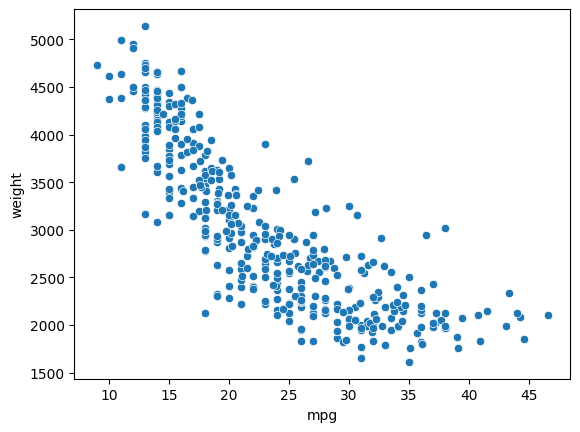

In [6]:
sns.scatterplot(data, x="mpg", y="weight")

In [7]:
# C)
import pandas as pd

data = pd.get_dummies(data, columns=["origin"], drop_first=True)

data = data.drop(columns=["name"])


In [8]:
X = data.drop(columns=["mpg"])
y = data["mpg"]

In [9]:
# D)

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin_japan  398 non-null    bool   
 7   origin_usa    398 non-null    bool   
dtypes: bool(2), float64(3), int64(3)
memory usage: 19.6 KB
<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: mpg
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [10]:
# E)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

scaler = StandardScaler() #MinMaxScaler

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [11]:
# F)
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"), #input_shape = (X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

In [12]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])

In [32]:
# H)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 67.2999 - mae: 6.9714 - val_loss: 52.3277 - val_mae: 5.8029
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 65.7240 - mae: 6.7633 - val_loss: 52.3198 - val_mae: 5.8024
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 66.6709 - mae: 6.9402 - val_loss: 52.3140 - val_mae: 5.8020
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 63.7728 - mae: 6.7696 - val_loss: 52.3229 - val_mae: 5.8026
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 63.0388 - mae: 6.7150 - val_loss: 52.3306 - val_mae: 5.8031
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 59.6504 - mae: 6.6279 - val_loss: 52.3008 - val_mae: 5.8012
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 61.4206 - mae: 6.6018 - val_loss: 52.3045 - val_mae: 5.8014
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 63.9907 - mae: 6.7128 - val_loss: 52.3301 - val_mae: 5.8031
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 59.4853 - mae: 

In [ ]:
# I)
test_digits = X_test[:10]
predictions = model.predict(test_digits)
test_loss, test_mae = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


## Excersise 1

In [38]:
data2 = pd.read_csv("cardio_train.csv", delimiter=";")

In [39]:
data2.head(11)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [40]:
data2.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [42]:
data2.dropna()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


<Axes: xlabel='height', ylabel='weight'>

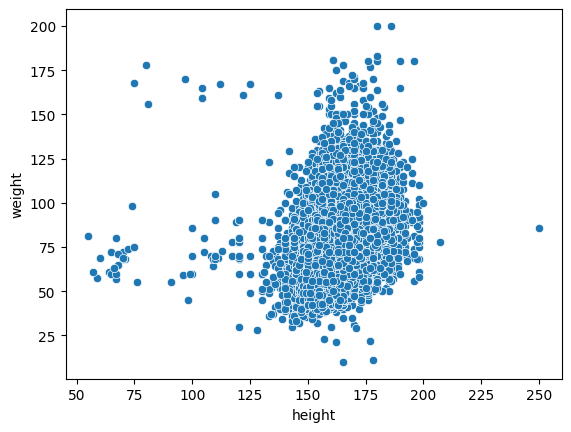

In [53]:
sns.scatterplot(data2, x="height", y="weight")

[Text(0.5, 1.0, 'weight distribution'),
 Text(0.5, 0, 'Weight'),
 Text(0, 0.5, 'People')]

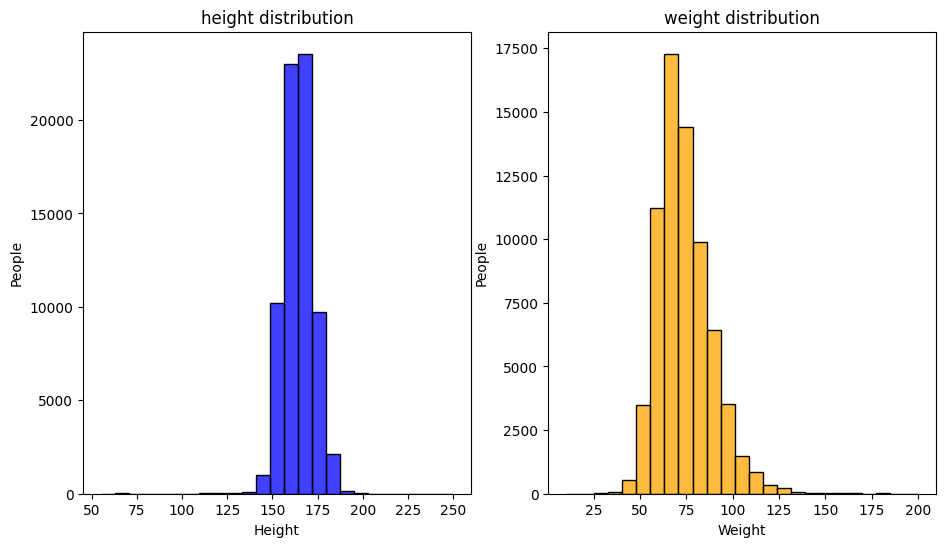

In [54]:
import matplotlib.pyplot as plt

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))

sns.histplot(data2["height"], bins=25, color="blue", ax=ax1)
sns.histplot(data2["weight"], bins=25, color="orange", ax=ax2)
ax1.set(title="height distribution", xlabel="Height", ylabel="People")
ax2.set(title="weight distribution", xlabel="Weight", ylabel="People")

In [62]:
X2 = data2.drop(columns=["height"])
y2 = data2["height"]

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.2, random_state=42)

scaler = StandardScaler() #MinMaxScaler

X_train2 = scaler.fit_transform(X_train2)
X_val2 = scaler.transform(X_val2)
X_test2 = scaler.transform(X_test2)

In [ ]:
import keras
from keras import layers

model2 = keras.Sequential([
    layers.Dense(64, activation="sigmoid"), 
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

In [91]:
model2.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["mae"])

In [92]:
model2.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=15, batch_size=128)

Epoch 1/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18890.3262 - mae: 132.9798 - val_loss: 56.7552 - val_mae: 5.4089
Epoch 2/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49.0623 - mae: 5.2267 - val_loss: 49.0320 - val_mae: 5.1600
Epoch 3/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47.3108 - mae: 5.1157 - val_loss: 51.2783 - val_mae: 5.3273
Epoch 4/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 46.9698 - mae: 5.1035 - val_loss: 48.0478 - val_mae: 5.1093
Epoch 5/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 43.5861 - mae: 5.0408 - val_loss: 48.0706 - val_mae: 5.1136
Epoch 6/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45.6049 - mae: 5.0088 - val_loss: 47.4343 - val_mae: 5.0690
Epoch 7/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 45.5509 - mae: 5.0324 - val_loss: 48.3118 - val_mae: 5.1352
Epoch 8/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45.7673 - mae: 5.0389 - val_loss: 46.9927 - val_mae: 5.0363
Epoch 9/15
438/438 ━━━━━━━━━━━━━━━━